> Universidade Federal da Bahia

> Instituto de Matemática e Estatística

> Departamento de Ciência da Computação

> MATA60 - Banco de Dados

> Docente: Vaninha Vieira 

> Alunos: Angelmário Santana, Tassia Silva e Litiano Moura

> Data: 31 de Maio de 2018


>> ## Tema: Business Intelligence 

>>> #### RELATÓRIO DA ANÁLISE ESTATÍSTICA DA BASE DE DADOS SOBRE PEDIDOS DE ALIMENTOS REALIZADOS POR APLICATIVO NO 2° SEMESTRE DE 2016.


#### Introdução

   Nos últimos anos um mercado que vem chamando a atenção de investidores é o mercado de delivery, que está cada vez mais virando tendência entre os brasileiros. Segundo a Associação Brasileira de Bares e Restaurantes (ABRASEL) já em 2015, o mercado brasileiro movimentava 9 bilhões de reais por ano e em 2017 o faturamento passou dos 10 bilhões.

   Muitos estabelecimentos que tinham apenas espaços físicos, têm investido no serviço de delivery para atrair clientes e aumentar o faturamento. O SEBRAE reforça a preferência dos consumidores
por lugares que ofereçam entrega em domicílio, e afirma que 12%, segundo pesquisa realizada, não possuem nem loja física, e seguem trabalhando apenas com entregas inclusive por aplicativos.

   Muitos consumidores entrevistados afirmaram que pelo comodismo de não ter que enfrentar o trânsito pelas taxas de serviços e de estacionamento. Entre outras, faz mais sentido ir no aplicativo e escolher no cardápio e solicitar a entrega, além da facilidade de ver vários tipos de comida com apenas alguns cliques, tem atraído vários clientes mesmo havendo taxa de entrega. Ainda assim vale a pena conferir as ofertas oferecidas pelo comércio nos aplicativos, explica a pesquisa.
   
   Neste trabalho, foi nos concedido uma base de dados que mostra a respeito das entregas de alimentos em algumas cidades brasileiras com intuito de inferir informações a respeito e aplicar Business Intelligence.
   
#### 1. Analisando os dados por meio estatístico

   Após pesquisar sobre o assunto, foi realizada uma análise na base da equipe. Foi necessário analisar os atributos da base para entender o comportamento dos dados. A equipe  contou com ajuda do [Jupyter Notebook](http://jupyter.org/) que através de programação em Python nos ajudou a manipular os dados e desenvolver os gráficos que serão apresentados a seguir para construção do trabalho.



In [5]:
import numpy as np
import pandas as pd
import statsmodels as st
import matplotlib.pyplot as plt
import seaborn as sns
from pandas.plotting import table
from ipywidgets import widgets
import datetime

In [6]:
#Carregando a base de dados
base = pd.read_csv('aplicativo.csv')

**1.1**  O primeiro passo foi observar a base de dados para obter uma visão geral dos atributos que existem na base.

In [7]:
#5 primeiros registros - Visão inicial dos dados
base.head(5)

,DATA_PEDIDO,HORA_PEDIDO,DIA_PEDIDO,VALOR_PRODUTOS,TAXA_ENTREGA,TOTAL_PEDIDO,FORMA_PAGAMENTO,AVALIACAO,STATUS,ID_ESTABELECIMENTO,TIPO_ESTABELECIMENTO,ID_USUARIO,DDD_USUARIO,DATA_CADASTRO_USUARIO,PRIMEIRO_PEDIDO,BAIRRO_USUARIO,CIDADE_USUARIO,SO_DISPOSITIVO
0,2016-07-05,19:51,Sunday,16.0,4.0,20.0,Dinheiro,NaN,Entregue,16,Lanchonete,50720,77,2016-07-05,Sim,Ipanema,Vitória da Conquista,Android
1,2016-07-05,20:58,Sunday,28.0,4.0,32.0,Dinheiro,NaN,Recusado,16,Lanchonete,48784,77,2016-06-18,Não,Candeias,Vitória da Conquista,iOS
2,2016-07-05,21:35,Sunday,13.0,4.0,17.0,Dinheiro,NaN,Recusado,16,Lanchonete,7016,77,2015-08-10,Não,Urbis I,Vitória da Conquista,Android
3,2016-07-06,23:22,Monday,11.5,4.0,15.5,Dinheiro,NaN,Entregue,16,Lanchonete,48536,77,2016-06-15,Não,Alto Maron,Vitória da Conquista,Android
4,2016-07-07,20:08,Tuesday,19.0,4.0,23.0,Dinheiro,NaN,Recusado,16,Lanchonete,21160,77,2015-12-21,Não,Candeias,Vitória da Conquista,Android


**1.2** Neste gráfico de Boxplot foi possível verificar alguns atributos e a sua distribuição no caso do “valor dos produtos”, “taxa de entrega” e do “total de pedidos”,  em que vimos a grande variedade entres as amostras coletadas, os valores discrepantes e a divisão dos dados quanto aos atributos mencionados.


Text(0.5,1,'Total de pedidos')

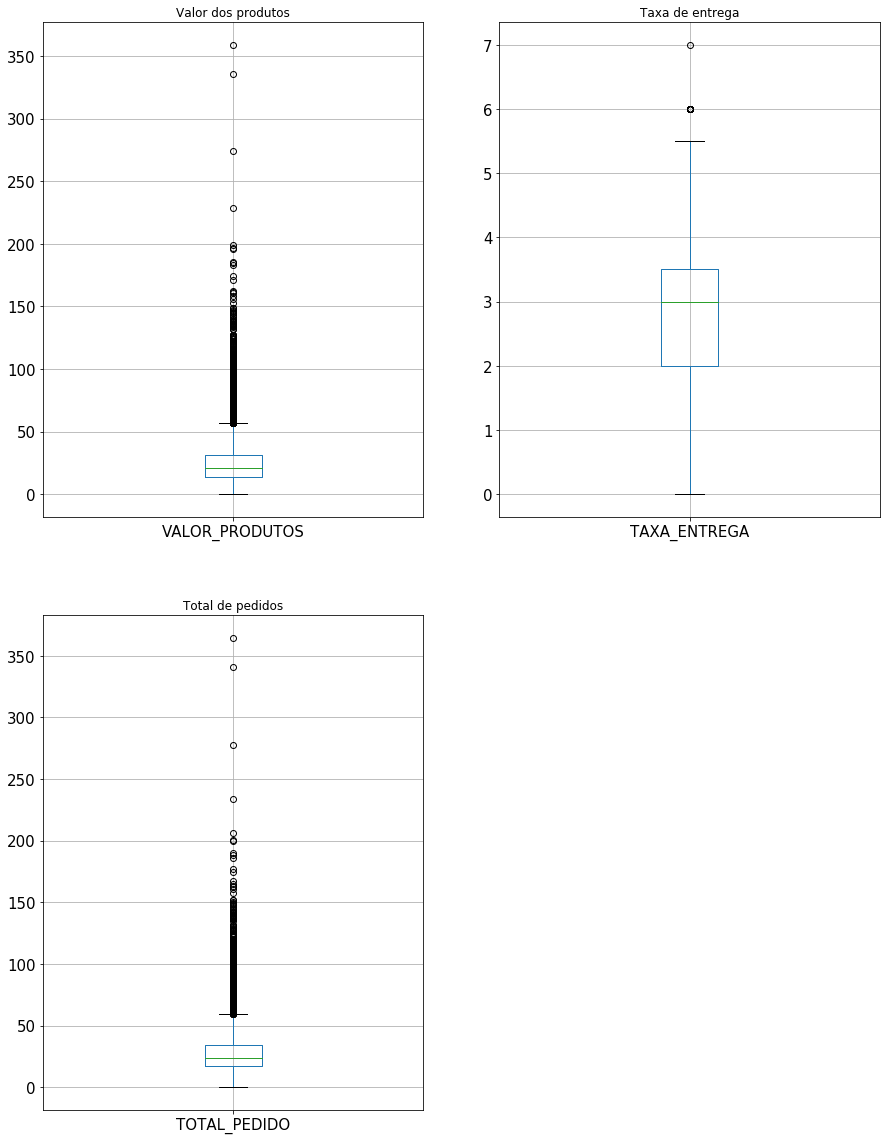

In [34]:
#Boxplot para verificar os valores discrepantes e a divisão dos dados
# do atributos mencionados

fig = plt.figure(figsize=(15,20))
ax5 = fig.add_subplot(221)
grafico = base[['VALOR_PRODUTOS']].boxplot(figsize=(20,5), 
                                           fontsize= fontsize,   ax=ax5)
plt.title('Valor dos produtos')


ax6 = fig.add_subplot(222)
grafico = base[['TAXA_ENTREGA']].boxplot(figsize=(20,5), 
                                         fontsize= fontsize,   ax=ax6)
plt.title('Taxa de entrega')


ax7 = fig.add_subplot(223)
grafico = base[['TOTAL_PEDIDO']].boxplot(figsize=(20,5), 
                                         fontsize= fontsize,   ax=ax7)
plt.title('Total de pedidos')



In [ ]:
#base.describe()
#min(base['DATA_PEDIDO'])
#max(base['DATA_PEDIDO'])

In [27]:
# Formas de pagamentos e a respectiva quantidade,
# dado que o status do pedido é Recusado.

filt = base[(base['STATUS'] == "Recusado")]
dff = pd.DataFrame(filt.groupby('FORMA_PAGAMENTO').size())
dff.columns = ['Quantidade']
dff.sort_values(by =['Quantidade'], ascending=False)



,Quantidade
ID_USUARIO,
40872,100
27784,79
10392,79
41408,78
41304,73
6856,71
264,68
37264,66
14480,65


In [16]:
#Obter os tipos de estabelecimento e as suas respectivas quantidades
# da cidade de Vitória da Conquista.

filt = base[(base['CIDADE_USUARIO'] == "Vitória da Conquista")]
dff = pd.DataFrame(filt.groupby('TIPO_ESTABELECIMENTO').size())
dff.columns = ['Quantidade']
dff.sort_values(by =['Quantidade'], ascending=False)

,Quantidade
TIPO_ESTABELECIMENTO,
Lanchonete,7065
Pizzaria,3733
Marmitex,3491
Comida Natural,2128
Restaurante,1975
Comida Japonesa,1152
Pizzaria/Esfiharia,1075
Restaurante/Tapiocaria,573
Hot-Dog,450


**1.3** A tabela mostrou que referenciava dados sobre pedidos de alimentos realizados através de aplicativo para estabelecimentos, que atendiam por meio de delivery em que a coleta foi realizada no segundo semestre de 2016 de cidades brasileiras com enfoque no estado da Bahia, observando a discrepância, já que tivemos apenas um pedido em Sorocaba interior de São Paulo

In [17]:
#Obter as cidades do usuário e suas respectivas quantidades
# na base de dados


df = pd.DataFrame(base.groupby('CIDADE_USUARIO').size())
df.columns = ['Quantidade']
df
df.sort_values(by =['Quantidade'], ascending=False)



,Quantidade
CIDADE_USUARIO,
Vitória da Conquista,23889
Ibicaraí,103
Brumado,71
Mortugaba,35
Sorocaba,1


**1.4** Verificamos que pela quantidade de pedidos realizados sobre o estabelecimento, lanchonete recebeu a maior parte das vendas mesmo sendo bastante distribuído os dados referentes aos outros estabelecimentos.



In [20]:
df = pd.DataFrame(base.groupby('TIPO_ESTABELECIMENTO').size())
df.columns = ['Quantidade']
df
df.sort_values(by =['Quantidade'], ascending=False)


,Quantidade
TIPO_ESTABELECIMENTO,
Lanchonete,7187
Pizzaria,3763
Marmitex,3597
Comida Natural,2135
Restaurante,2006
Comida Japonesa,1167
Pizzaria/Esfiharia,1103
Restaurante/Tapiocaria,584
Pizzaria/Lanchonete,455


**1.5** Foi verificado também pelo gráfico que a maioria dos pedidos entregues foram pagos pela forma de pagamento em dinheiro. Mesmo assim, vimos que poucos pedidos foram recusados.

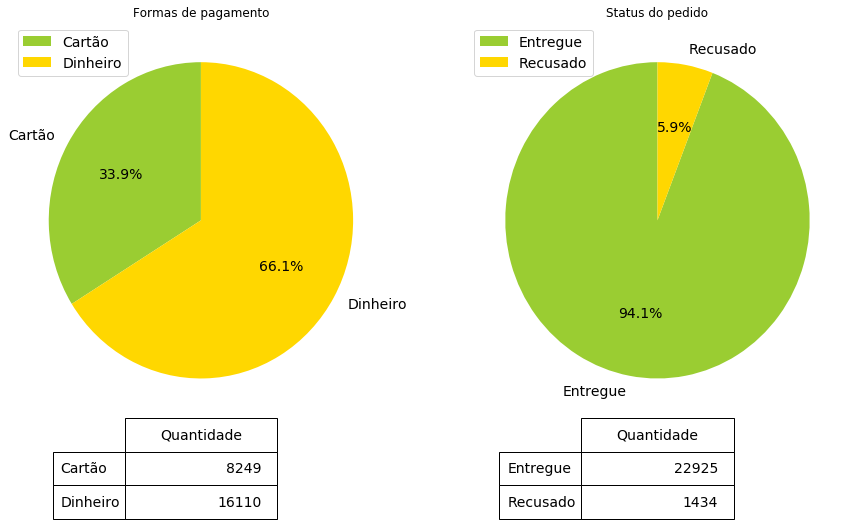

In [21]:
plt.rcParams.update({'text.color': 'black'})
fontsize = 14
font_size=14
d1 = pd.DataFrame(base.groupby('FORMA_PAGAMENTO').size())
d1.columns = ['Quantidade']
fig = plt.figure(figsize=(15,16))


colors = ['yellowgreen', 'gold']
# plot chart
ax1 = fig.add_subplot(221)
grafico = d1.plot(kind = 'pie', autopct='%1.1f%%', 
                  startangle=90, shadow=False,
                 figsize=(5,5), fontsize= fontsize, 
                  colors = colors, 
                  legend = True,   ax=ax1, subplots=True)
plt.title('Formas de pagamento')
plt.ylabel('')
plt.legend(loc=2, prop={'size': fontsize})

d2 = pd.DataFrame(base.groupby('STATUS').size())
d2.columns = ['Quantidade']

ax2 = fig.add_subplot(222)
grafico = d2.plot(kind = 'pie',autopct='%1.1f%%', 
                  startangle=90, shadow=False, 
                   figsize=(5,5),fontsize=fontsize, 
                  colors = colors, 
                  legend = True,   ax=ax2, subplots=True)
plt.title('Status do pedido')
plt.ylabel('')
plt.legend(loc=2, prop={'size': fontsize})

#ax3 = fig.add_subplot(223)

#ax3.axis('off')
mpl_table = table(ax2, d2, loc='bottom', 
                  rowLoc='left', 
                  colLoc = 'center')
mpl_table.auto_set_font_size(False)
mpl_table.set_fontsize(font_size)
mpl_table.scale(0.4,2.8)

#ax4 = fig.add_subplot(224)

#ax4.axis('off')
mpl_table = table(ax1, d1, loc='bottom', 
                  rowLoc='left', 
                  colLoc = 'center')
mpl_table.auto_set_font_size(False)
mpl_table.set_fontsize(font_size)
mpl_table.scale(0.4,2.8)



**1.6** No gráficos de histograma, é possível através de atributos numéricos observar a distribuição na base de dados 


Text(0.5,1,'Quantidade de pedidos por usuário')

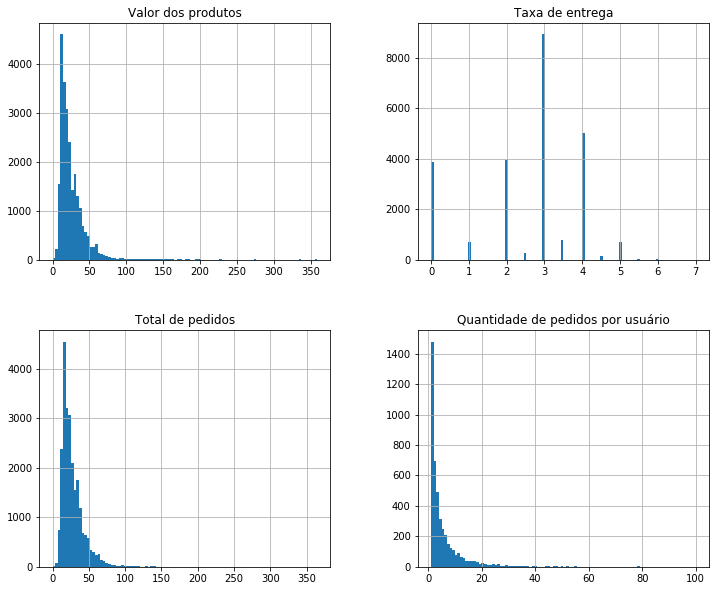

In [35]:
#Histograma dos atributos numéricos para 
#observar a distribuição na base de dados.

fontsize = 15
font_size = 15

fig = plt.figure(figsize=(12,10))
ax5 = fig.add_subplot(221)
base.hist(column='VALOR_PRODUTOS', bins=100, figsize=(20,5), ax=ax5)
plt.title('Valor dos produtos')


ax6 = fig.add_subplot(222)
base.hist(column='TAXA_ENTREGA', bins=100, figsize=(20,5),  ax=ax6)
plt.title('Taxa de entrega')


ax7 = fig.add_subplot(223)
base.hist(column='TOTAL_PEDIDO', bins=100, figsize=(20,5),   ax=ax7)
plt.title('Total de pedidos')

dff = pd.DataFrame(base.groupby('ID_USUARIO').size())
dff.columns = ['Quantidade']
dff.sort_values(by =['Quantidade'], ascending=False)
ax8 = fig.add_subplot(224)

dff.hist(column='Quantidade', bins=100, figsize=(20,5),   ax=ax8)
plt.title('Quantidade de pedidos por usuário')


